In [1]:

import pandas
with open("nba_2013.csv", 'r') as csvfile:
    nba = pandas.read_csv(csvfile)

In [2]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
#Let's start with importing necessary libraries
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [3]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player        481 non-null    object 
 1   pos           481 non-null    object 
 2   age           481 non-null    int64  
 3   bref_team_id  481 non-null    object 
 4   g             481 non-null    int64  
 5   gs            481 non-null    int64  
 6   mp            481 non-null    int64  
 7   fg            481 non-null    int64  
 8   fga           481 non-null    int64  
 9   fg.           479 non-null    float64
 10  x3p           481 non-null    int64  
 11  x3pa          481 non-null    int64  
 12  x3p.          414 non-null    float64
 13  x2p           481 non-null    int64  
 14  x2pa          481 non-null    int64  
 15  x2p.          478 non-null    float64
 16  efg.          479 non-null    float64
 17  ft            481 non-null    int64  
 18  fta           481 non-null    

In [4]:
nba.describe()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,479.000000,481.000000,481.000000,414.000000,...,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.0
mean,26.509356,53.253638,25.571726,1237.386694,192.881497,424.463617,0.436436,39.613306,110.130977,0.285111,...,55.810811,162.817048,218.627859,112.536383,39.280665,24.103950,71.862786,105.869023,516.582121,2013.0
std,4.198265,25.322711,29.658465,897.258840,171.832793,368.850833,0.098672,50.855639,132.751732,0.157633,...,62.101191,145.348116,200.356507,131.019557,34.783590,30.875381,62.701690,71.213627,470.422228,0.0
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.0
25%,23.000000,32.000000,0.000000,388.000000,47.000000,110.000000,0.400500,0.000000,3.000000,0.234355,...,12.000000,43.000000,55.000000,20.000000,9.000000,4.000000,21.000000,44.000000,115.000000,2013.0
50%,26.000000,61.000000,10.000000,1141.000000,146.000000,332.000000,0.438000,16.000000,48.000000,0.330976,...,35.000000,135.000000,168.000000,65.000000,32.000000,14.000000,58.000000,104.000000,401.000000,2013.0
75%,29.000000,76.000000,54.000000,2016.000000,307.000000,672.000000,0.479500,68.000000,193.000000,0.375000,...,73.000000,230.000000,310.000000,152.000000,60.000000,32.000000,108.000000,158.000000,821.000000,2013.0
max,39.000000,83.000000,82.000000,3122.000000,849.000000,1688.000000,1.000000,261.000000,615.000000,1.000000,...,440.000000,783.000000,1114.000000,721.000000,191.000000,219.000000,295.000000,273.000000,2593.000000,2013.0


In [5]:
#check for null values
nba.isnull().any()

player          False
pos             False
age             False
bref_team_id    False
g               False
gs              False
mp              False
fg              False
fga             False
fg.              True
x3p             False
x3pa            False
x3p.             True
x2p             False
x2pa            False
x2p.             True
efg.             True
ft              False
fta             False
ft.              True
orb             False
drb             False
trb             False
ast             False
stl             False
blk             False
tov             False
pf              False
pts             False
season          False
season_end      False
dtype: bool

In [6]:
#fillna with series mean

nba["fg."].fillna(nba["fg."].mean(),inplace=True)
nba["x2p."].fillna(nba["x2p."].mean(),inplace=True)
nba["efg."].fillna(nba["efg."].mean(),inplace=True)
nba["x3p."].fillna(nba["x3p."].mean(),inplace=True)
nba["ft."].fillna(nba["ft."].mean(),inplace=True)

In [7]:
#Select only the numeric columns from the dataset¶

print(nba.columns.values)

['player' 'pos' 'age' 'bref_team_id' 'g' 'gs' 'mp' 'fg' 'fga' 'fg.' 'x3p'
 'x3pa' 'x3p.' 'x2p' 'x2pa' 'x2p.' 'efg.' 'ft' 'fta' 'ft.' 'orb' 'drb'
 'trb' 'ast' 'stl' 'blk' 'tov' 'pf' 'pts' 'season' 'season_end']


In [8]:
num_columns = ['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts']
nba_numeric = nba[num_columns]

In [9]:
#normalize all the columns
nba_normalized = nba_numeric.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [10]:
#Categorical Columns

nba_category = nba[['player', 'bref_team_id', 'season']]


In [11]:
nba = pd.concat([nba_category, nba_normalized], axis=1)

from sklearn.model_selection import train_test_split

# The columns that we will be making predictions with.
x_columns = nba[['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf']]

# The column that we want to predict.
y_column = nba["pts"]

x_train, x_test, y_train, y_test = train_test_split(x_columns, y_column, test_size=0.3, random_state=0)

In [12]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

# check for increasing neighbour values to see which has the highest regression score

for k in range(10):
    k_value = k + 1
    knn = KNeighborsRegressor(n_neighbors = k_value)
    knn.fit(x_train, y_train) 
    y_pred = knn.predict(x_test)
    print ("Regression score is:",format(metrics.r2_score(y_test, y_pred),'.4f'), "for k_value:", k_value)

Regression score is: 0.9145 for k_value: 1
Regression score is: 0.9464 for k_value: 2
Regression score is: 0.9548 for k_value: 3
Regression score is: 0.9594 for k_value: 4
Regression score is: 0.9583 for k_value: 5
Regression score is: 0.9579 for k_value: 6
Regression score is: 0.9579 for k_value: 7
Regression score is: 0.9609 for k_value: 8
Regression score is: 0.9576 for k_value: 9
Regression score is: 0.9557 for k_value: 10


In [13]:
knn = KNeighborsRegressor(n_neighbors = 8)
knn.fit(x_train, y_train) 
y_pred = knn.predict(x_test)
print ("Mean Squared Error is:", format(metrics.mean_squared_error(y_test, y_pred), '.7f'))
print ("Regression score is:", format(metrics.r2_score(y_test, y_pred),'.4f'))

Mean Squared Error is: 0.0011143
Regression score is: 0.9609


In [14]:
Test_With_Predicted = pd.DataFrame({'Actual Points': y_test.tolist(), 'Predicted Points': y_pred.tolist()})

Test_With_Predicted

,Actual Points,Predicted Points
0,0.168145,0.125723
1,0.276514,0.297243
2,0.422676,0.363189
3,0.007327,0.011088
4,0.381026,0.373939
...,...,...
140,0.426919,0.421664
141,0.013498,0.019379
142,0.312379,0.303943
143,0.306980,0.273766


Text(0.5, 1.0, 'Actual Vs Predicted Pts.')

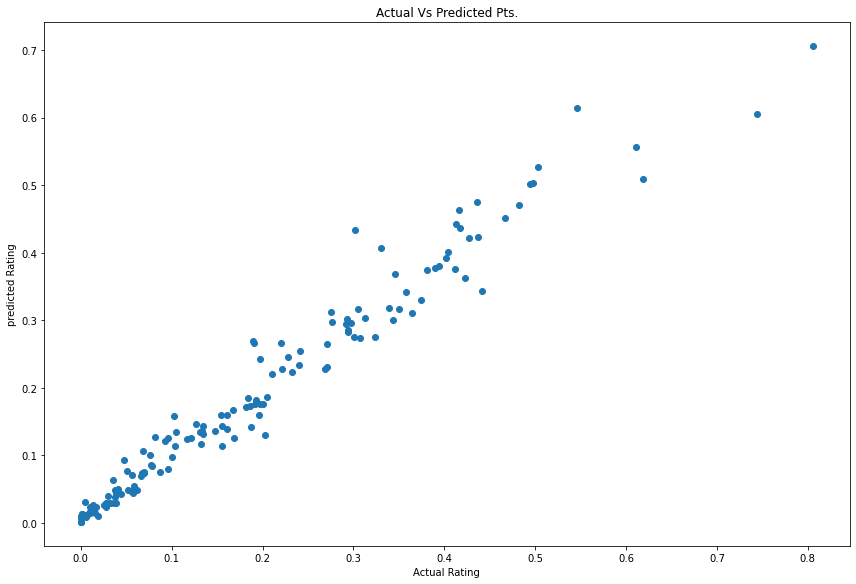

In [20]:
plt.figure(figsize=(12,8))
plt.scatter(y_test,y_pred)
#plt.plot(y_test,y_pred,'--k')
#plt.plot([0,3000],[0,3000], '--k')
plt.axis('tight')
plt.xlabel('Actual Rating')
plt.ylabel('predicted Rating')
plt.tight_layout()
plt.title("Actual Vs Predicted Pts.")

In [21]:
# let's save the model
import pickle

with open('modelForPrediction.sav', 'wb') as f:
    pickle.dump(knn,f)